In [15]:
import numpy as np
import pandas as pd

### Series

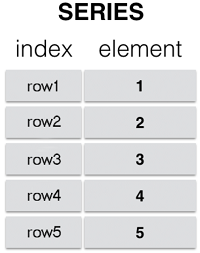

In [2]:
my_series = pd.Series([1, 2, 3, 4, 5], index=['row1', 'row2', 'row3', 'row4', 'row5'])
my_series

row1    1
row2    2
row3    3
row4    4
row5    5
dtype: int64

In [8]:
# Show Values
my_series.values

array([1, 2, 3, 4, 5], dtype=int64)

In [9]:
# Show index
my_series.index

Index(['row1', 'row2', 'row3', 'row4', 'row5'], dtype='object')

In [11]:
# Select index
print( my_series.row2 )
print( my_series['row2'] )

2
2


In [12]:
# Boolean indexing
my_series[my_series>3]

row4    4
row5    5
dtype: int64

In [13]:
# Set alphabet label as new index
my_series.index = ['A','B','C','D','E']
my_series

A    1
B    2
C    3
D    4
E    5
dtype: int64

### DataFrame

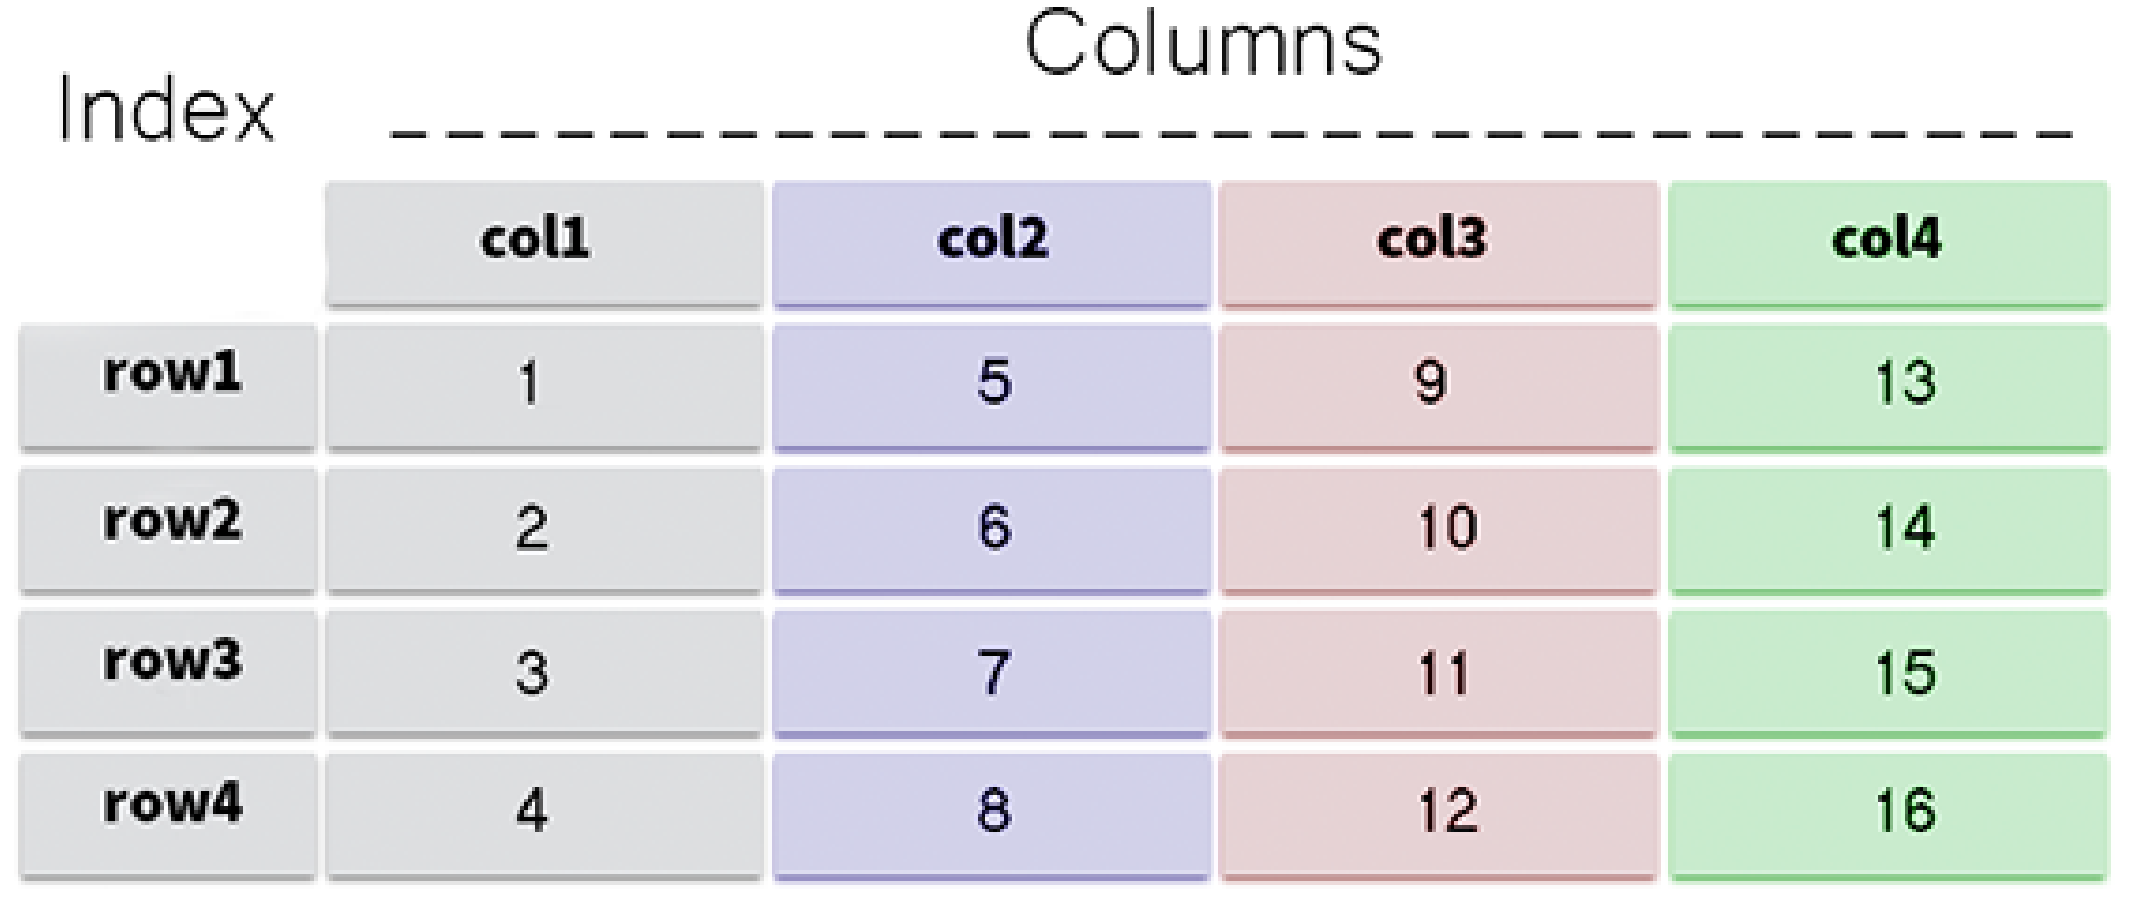

In [16]:
my_array = np.arange(1,17, 1)
my_array = my_array.reshape(4,4).T
my_array

array([[ 1,  5,  9, 13],
       [ 2,  6, 10, 14],
       [ 3,  7, 11, 15],
       [ 4,  8, 12, 16]])

In [17]:
df = pd.DataFrame(my_array, index=['row1', 'row2', 'row3', 'row4'], columns=['col1', 'col2', 'col3', 'col4'])
df

,col1,col2,col3,col4
row1,1,5,9,13
row2,2,6,10,14
row3,3,7,11,15
row4,4,8,12,16


#### Create DataFrame with Dictionary

In [44]:
my_dict = {'col1':[1,2,3,4],'col2':[5,6,7,8],'col3':[9,10,11,12],'col4':[13,14,15,19]}
my_df = pd.DataFrame(my_dict, index=['row1','row2','row3','row4'])
my_df

,col1,col2,col3,col4
row1,1,5,9,13
row2,2,6,10,14
row3,3,7,11,15
row4,4,8,12,19


In [45]:
# Show index
df.index

Index(['row1', 'row2', 'row3', 'row4'], dtype='object')

In [46]:
# Show Columns
df.columns

Index(['col1', 'col2', 'col3', 'col4'], dtype='object')

In [47]:
# Show Value
df.values

array([[ 0,  5,  9, 13],
       [ 2,  6, 10, 14],
       [ 3,  7, 11, 15],
       [ 4,  8, 12, 16]])

#### Selecting

In [48]:
df.loc['row1'][:]

col1     0
col2     5
col3     9
col4    13
Name: row1, dtype: int32

In [49]:
df.loc['row1']['col2']

5

In [50]:
df.iloc[0][1]

5

In [51]:
df.loc['row1']

col1     0
col2     5
col3     9
col4    13
Name: row1, dtype: int32

#### Edit a DataFrame

In [52]:
my_df['col5'] = [20 ,21 ,22 ,23]
my_df

,col1,col2,col3,col4,col5
row1,1,5,9,13,20
row2,2,6,10,14,21
row3,3,7,11,15,22
row4,4,8,12,19,23


In [53]:
my_df.loc[['row1','row2'],'col1'] = 0
my_df

,col1,col2,col3,col4,col5
row1,0,5,9,13,20
row2,0,6,10,14,21
row3,3,7,11,15,22
row4,4,8,12,19,23


In [54]:
df.iloc[0][0] = 0
df

,col1,col2,col3,col4
row1,0,5,9,13
row2,2,6,10,14
row3,3,7,11,15
row4,4,8,12,16


In [55]:
# Reset index
df.reset_index(drop=True)

,col1,col2,col3,col4
0,0,5,9,13
1,2,6,10,14
2,3,7,11,15
3,4,8,12,16


In [56]:
# Deleting
my_df.drop('col5',axis=1)

,col1,col2,col3,col4
row1,0,5,9,13
row2,0,6,10,14
row3,3,7,11,15
row4,4,8,12,19


In [57]:
# Renaming
my_df.rename(columns={'col4':'col_four'})

,col1,col2,col3,col_four,col5
row1,0,5,9,13,20
row2,0,6,10,14,21
row3,3,7,11,15,22
row4,4,8,12,19,23


In [58]:
# Replacing
my_df.replace({0:1})

,col1,col2,col3,col4,col5
row1,1,5,9,13,20
row2,1,6,10,14,21
row3,3,7,11,15,22
row4,4,8,12,19,23


#### Apply function on index

In [59]:
my_df.col1 = ['{:.2f}'.format(x) for x in my_df.iloc[:,0] ]
my_df

,col1,col2,col3,col4,col5
row1,0.00,5,9,13,20
row2,0.00,6,10,14,21
row3,3.00,7,11,15,22
row4,4.00,8,12,19,23


In [60]:
my_df['col2'] = my_df['col2'].apply(lambda x:'{:.2f}'.format(x))
my_df

,col1,col2,col3,col4,col5
row1,0.00,5.00,9,13,20
row2,0.00,6.00,10,14,21
row3,3.00,7.00,11,15,22
row4,4.00,8.00,12,19,23


#### Sorting

In [61]:
# sort index
my_df.sort_index(axis=1,ascending=False)

,col5,col4,col3,col2,col1
row1,20,13,9,5.00,0.00
row2,21,14,10,6.00,0.00
row3,22,15,11,7.00,3.00
row4,23,19,12,8.00,4.00


In [62]:
# sort values
my_df.sort_values(by='col1',ascending=False)

,col1,col2,col3,col4,col5
row4,4.00,8.00,12,19,23
row3,3.00,7.00,11,15,22
row1,0.00,5.00,9,13,20
row2,0.00,6.00,10,14,21
